<a href="https://colab.research.google.com/github/Pammu10/python-projects/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime


<ipython-input-15-01d4ba14ccf1>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [ ]:
df = pd.read_csv('sample_data/RELIANCE.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-23,2449.000000,2466.199951,2425.000000,2430.300049,2421.745361,5055324
1,2023-01-24,2440.000000,2443.649902,2387.350098,2415.949951,2407.445801,7609558
2,2023-01-25,2412.449951,2414.699951,2380.000000,2382.550049,2374.163330,5715684
3,2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2329.122559,11920991
4,2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2351.443604,10047822
...,...,...,...,...,...,...,...
241,2024-01-16,2779.949951,2792.600098,2741.000000,2749.250000,2749.250000,4534512
242,2024-01-17,2719.000000,2772.550049,2710.050049,2723.149902,2723.149902,6098691
243,2024-01-18,2702.800049,2742.000000,2702.500000,2735.899902,2735.899902,5139719
244,2024-01-19,2752.000000,2752.000000,2718.000000,2734.899902,2734.899902,5211352


In [ ]:
# creating index
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')


DatetimeIndex(['2023-01-23', '2023-01-24', '2023-01-25', '2023-01-27',
               '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
               '2023-02-03', '2023-02-06',
               ...
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18',
               '2024-01-19', '2024-01-20'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()


,Open-Close,High-Low
Date,,
2023-01-23,18.699951,41.199951
2023-01-24,24.050049,56.299804
2023-01-25,29.899902,34.699951
2023-01-27,47.049804,75.700196
2023-01-30,-28.050049,70.899902


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
Y_test = y[split:]

In [ ]:
cls = SVC().fit(X_train, y_train)

df['Predicted_Signal'] = cls.predict(X)

# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2023-01-23,2449.000000,2466.199951,2425.000000,2430.300049,2421.745361,5055324,18.699951,41.199951,1,NaN,NaN,NaN,NaN
2023-01-24,2440.000000,2443.649902,2387.350098,2415.949951,2407.445801,7609558,24.050049,56.299804,0,-0.005905,-0.005905,-0.005905,-0.005905
2023-01-25,2412.449951,2414.699951,2380.000000,2382.550049,2374.163330,5715684,29.899902,34.699951,1,-0.013825,-0.000000,-0.019729,-0.005905
2023-01-27,2384.399902,2387.350098,2311.649902,2337.350098,2329.122559,11920991,47.049804,75.700196,0,-0.018971,-0.018971,-0.038701,-0.024876
2023-01-30,2331.699951,2371.899902,2301.000000,2359.750000,2351.443604,10047822,-28.050049,70.899902,0,0.009583,0.000000,-0.029117,-0.024876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-16,2779.949951,2792.600098,2741.000000,2749.250000,2749.250000,4534512,30.699951,51.600098,0,-0.013987,-0.013987,0.141287,0.182683
2024-01-17,2719.000000,2772.550049,2710.050049,2723.149902,2723.149902,6098691,-4.149902,62.500000,0,-0.009494,-0.000000,0.131794,0.182683
2024-01-18,2702.800049,2742.000000,2702.500000,2735.899902,2735.899902,5139719,-33.099853,39.500000,1,0.004682,0.000000,0.136476,0.182683


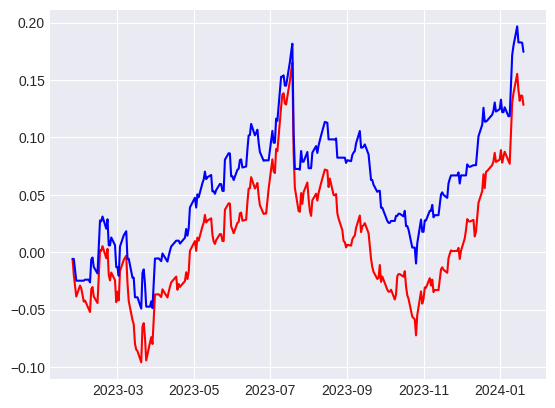

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')


In [ ]:
from yahoo_fin.stock_info import get_data

In [ ]:
amazon_daily= get_data("amzn", start_date="12/04/2000", end_date="12/04/2019", index_as_date = True, interval="1d")
amazon_daily

,open,high,low,close,adjclose,volume,ticker
2000-12-04,1.259375,1.359375,1.162500,1.328125,1.328125,165110000,AMZN
2000-12-05,1.356250,1.381250,1.237500,1.268750,1.268750,199398000,AMZN
2000-12-06,1.234375,1.300000,1.181250,1.181250,1.181250,176516000,AMZN
2000-12-07,1.153125,1.171875,1.006250,1.068750,1.068750,212950000,AMZN
2000-12-08,1.165625,1.234375,1.062500,1.171875,1.171875,259396000,AMZN
...,...,...,...,...,...,...,...
2019-11-26,88.996002,89.851501,88.917503,89.847000,89.847000,63624000,AMZN
2019-11-27,90.050003,91.224998,89.865501,90.925499,90.925499,60512000,AMZN
2019-11-29,90.889000,91.234497,90.039497,90.040001,90.040001,38468000,AMZN
2019-12-02,90.220001,90.277496,88.134003,89.080002,89.080002,78512000,AMZN
